In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ultranest
import read_beam_FEKO as rf
from ultranest.plot import cornerplot

In [2]:
o = rf.read_beam_FEKO('nominal.out',0)

 Frequency in Hz:               FREQ =    2.50000E+07

 Frequency in Hz:               FREQ =    2.60000E+07

 Frequency in Hz:               FREQ =    2.70000E+07

 Frequency in Hz:               FREQ =    2.80000E+07

 Frequency in Hz:               FREQ =    2.90000E+07

 Frequency in Hz:               FREQ =    3.00000E+07

 Frequency in Hz:               FREQ =    3.10000E+07

 Frequency in Hz:               FREQ =    3.20000E+07

 Frequency in Hz:               FREQ =    3.30000E+07

 Frequency in Hz:               FREQ =    3.40000E+07

 Frequency in Hz:               FREQ =    3.50000E+07

 Frequency in Hz:               FREQ =    3.60000E+07

 Frequency in Hz:               FREQ =    3.70000E+07

 Frequency in Hz:               FREQ =    3.80000E+07

 Frequency in Hz:               FREQ =    3.90000E+07

 Frequency in Hz:               FREQ =    4.00000E+07

 Frequency in Hz:               FREQ =    4.10000E+07

 Frequency in Hz:               FREQ =    4.20000E+07

 Frequency

In [3]:
theta = 90 - o[2]
phi = o[1]
freq = o[0]
gain = o[5]
theta, phi = np.meshgrid(theta, phi)

In [4]:
def Gaussian2D(A, sigx, sigy):
    return A * np.exp(-(theta*np.pi/180*np.cos(phi*np.pi/180))**2/2/sigx**2 - (theta*np.pi/180*np.sin(phi*np.pi/180))**2/2/sigy**2) 

In [5]:
# Define model to simulate data
def model1(paras):
    A, sigx, sigy = paras
    return Gaussian2D(A,sigx,sigy).T

In [6]:
sigma = np.std(gain[0])
param_names = ['A', 'sigx', 'sigy']
def my_prior_transform(cube):
    params = cube.copy()

    # transform location parameter: uniform prior
    lo = 0
    hi = 1
    params[0] = cube[0] * (hi - lo) + lo

    lo = 0
    hi = 2
    params[1] = cube[1] * (hi - lo) + lo

    lo = 0
    hi = 2
    params[1] = cube[1] * (hi - lo) + lo
    
    return params
def my_likelihood(params):
    mo = model1(params)
    diff = mo - gain[0]
    return -0.5 * np.sum((diff/sigma)**2)

In [7]:
sampler = ultranest.ReactiveNestedSampler(param_names, my_likelihood, my_prior_transform)

In [8]:
result = sampler.run(min_num_live_points=200)
sampler.print_results()

[ultranest] Sampling 200 live points from prior ...


[ultranest] Explored until L=-2e+02  .79 [-185.8510..-185.8508]*| it/evals=3915/8261 eff=48.5672% N=200 0     
[ultranest] Likelihood function evaluations: 8261
[ultranest]   logZ = -200.8 +- 0.1915
[ultranest] Effective samples strategy satisfied (ESS = 921.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.19, need <0.5)
[ultranest]   logZ error budget: single: 0.26 bs:0.19 tail:0.01 total:0.19 required:<0.50
[ultranest] done iterating.

logZ = -200.798 +- 0.380
  single instance: logZ = -200.798 +- 0.260
  bootstrapped   : logZ = -200.787 +- 0.379
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    A                   : 0.5274│ ▁ ▁▁▁▁▁▁▁▁▂▂▃▃▃▅▅▆▇▆▇▇▅▅▄▄▂▂▁▁▁▁▁▁▁▁▁ │0.5423    0.5353 +- 0.0019
    sigx                : 0.6453│ ▁▁▁▁▁▁▁▁▂▂▂▃▅▅▆▆▇▆▇▆▆▇▆▅▄▃▃▂▁▁▁▁▁▁▁▁▁ │0.6773    0.6612 +- 0.0043
    sigy             

In [9]:
residuals = (gain[0] - model1([0.5353,0.6612,0.7028])).T

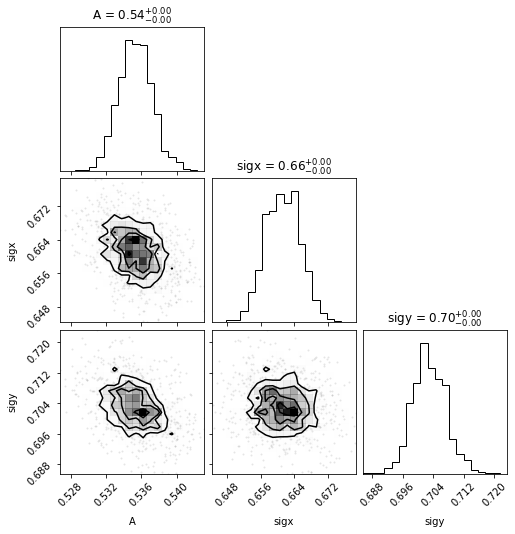

In [10]:
cornerplot(result)

In [21]:
sigma = 0.6613*180/np.pi
#make sigma a input parameter
def Acos(R, theta, miu, nu):
    part1 = np.cos(miu*theta*np.pi/180)*(R/(sigma/1.43))**miu
    part2 = P(miu,nu,R**2/(sigma/1.43)**2)
    part3 = np.exp(-R**2/(4*(sigma/1.43)**2))
    return part1*part2*part3

def Asin(R, theta, miu, nu):
    part1 = np.sin(miu*theta*np.pi/180)*(R/(sigma/1.43))**miu
    part2 = P(miu,nu,R**2/(sigma/1.43)**2)
    part3 = np.exp(-R**2/(4*(sigma/1.43)**2))
    return part1*part2*part3

def P(miu,nu,u):
    terms = []
    p = 0
    while p <= nu:
        up = np.math.factorial(miu + nu)*np.math.factorial(nu)
        down = np.math.factorial(miu + p)*np.math.factorial(p)*np.math.factorial(nu-p)
        term = (-2)**(nu-p)* up/down * u[i][j]**p
        terms.append(term)
        p += 1
    print(terms)
    
def P(miu,nu,u):
    terms = []
    p = 0
    while p <= nu:
        up = np.math.factorial(miu + nu)*np.math.factorial(nu)
        down = np.math.factorial(miu + p)*np.math.factorial(p)*np.math.factorial(nu-p)
        term = (-2)**(nu-p)* up/down * u**p
        terms.append(term)
        p += 1
    terms = np.array(terms)
    return np.sum(terms,axis = 0)

#Normalization
def normalize(array):
    q = 0
    theta = 0
    while theta <= 90:
        for i in range(360):
            q += (array[theta*360 + i])**2 * (np.pi/180)**2 * np.sin(theta*np.pi/180)
        theta += 1
    return array/q

def TDH(rank):
    """return matrix A = [f1, f2, f3, ...] for rank 0 to rank TDH functions"""
    zz00c = Acos(xx, yy, 0, 0)
    zz00c2d = zz00c.flatten()
    array = normalize(zz00c2d)
    r = 1
    while r <= rank:
        m = 0
        while m <= r:
            if (r - m)%2 == 0:
                n = (r - m)/2
                if m == 0:
                    cosine = Acos(xx,yy,m,n)
                    cosine2d = cosine.flatten()
                    ncos = normalize(cosine2d)
                    array = np.vstack((array, ncos))
                    m += 2
                else:
                    cosine = Acos(xx,yy,m,n)
                    cosine2d = cosine.flatten()
                    ncos = normalize(cosine2d)
                    sine = Asin(xx,yy,m,n)
                    sine2d = sine.flatten()
                    nsin = normalize(sine2d)
                    array = np.vstack((array, ncos))
                    array = np.vstack((array, nsin))
                    m += 2
            else:
                m += 1
        r += 1
    matrix = np.matrix(array).T
    return matrix

def model(rank, coe):
    A = TDH(rank)
    a = np.matrix(coe).T
    return np.matmul(A,a)

def simulation(coe, sigma):
    rank = 0
    count = 1
    length = len(coe) - 1
    while length > count:
        rank += 1
        count += rank + 1
    mo = model(rank,coe)
    noise = np.random.default_rng().normal(0.0, sigma*np.max(mo),360*91)
    noi = np.matrix(noise).T
    data = mo + noi
    return data

def solve(A, data):
    AT = A.T
    ATA = np.matmul(AT,A)
    ATAinverse = np.linalg.inv(ATA)
    half = np.matmul(ATAinverse,AT)
    x = np.matmul(half,data)
    return x

def residual(A,data):
    x = solve(A, data)
    AT = A.T
    fittingmodel = np.matmul(A, x)
    r = data - fittingmodel
    return r

def residual2D(A,data):
    r = residual(A,data)
    r2D = r.reshape(360,91)
    return r2D

def covariance(A,data):
    AT = A.T
    ATA = np.matmul(AT,A)
    ATAinverse = np.linalg.inv(ATA)
    r = residual(A,data)
    rT = r.T
    rTr = np.matmul(rT,r)
    s = rTr/((len(data))-10)
    s2 = s.item(0)
    covariance = s2*ATAinverse
    return covariance

In [17]:
theta

array([[90., 89., 88., ...,  2.,  1.,  0.],
       [90., 89., 88., ...,  2.,  1.,  0.],
       [90., 89., 88., ...,  2.,  1.,  0.],
       ...,
       [90., 89., 88., ...,  2.,  1.,  0.],
       [90., 89., 88., ...,  2.,  1.,  0.],
       [90., 89., 88., ...,  2.,  1.,  0.]])

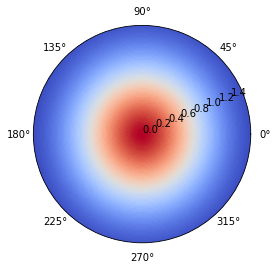

In [18]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,model1([0.5353,0.6612,0.7028]).T.reshape(360,91),cmap='coolwarm',shading='auto')

In [22]:
TDH20 = TDH(20)

In [23]:
TDHcube = []
for i in range(20):
    TDHcube.append(TDH20[:,:(i+1)])

In [24]:
resi = np.matrix(residuals.flatten())
coetotal = []
frtotal = []
covtotal = []
fittingmodeltotal = []
for i in range(20):
    A = TDHcube[i]
    coe = solve(A,resi.T)
    finalresi = residual2D(A,resi.T)
    fittingmodel = np.matmul(A, coe)
    fittingmodel2D = fittingmodel.reshape(360,91)
    cov = covariance(A, resi.T)
    coetotal.append(coe)
    frtotal.append(finalresi)
    covtotal.append(cov)
    fittingmodeltotal.append(fittingmodel2D)

In [25]:
sigmatotal = []
for i in covtotal:
    sigmatotal.append(np.diag(i))

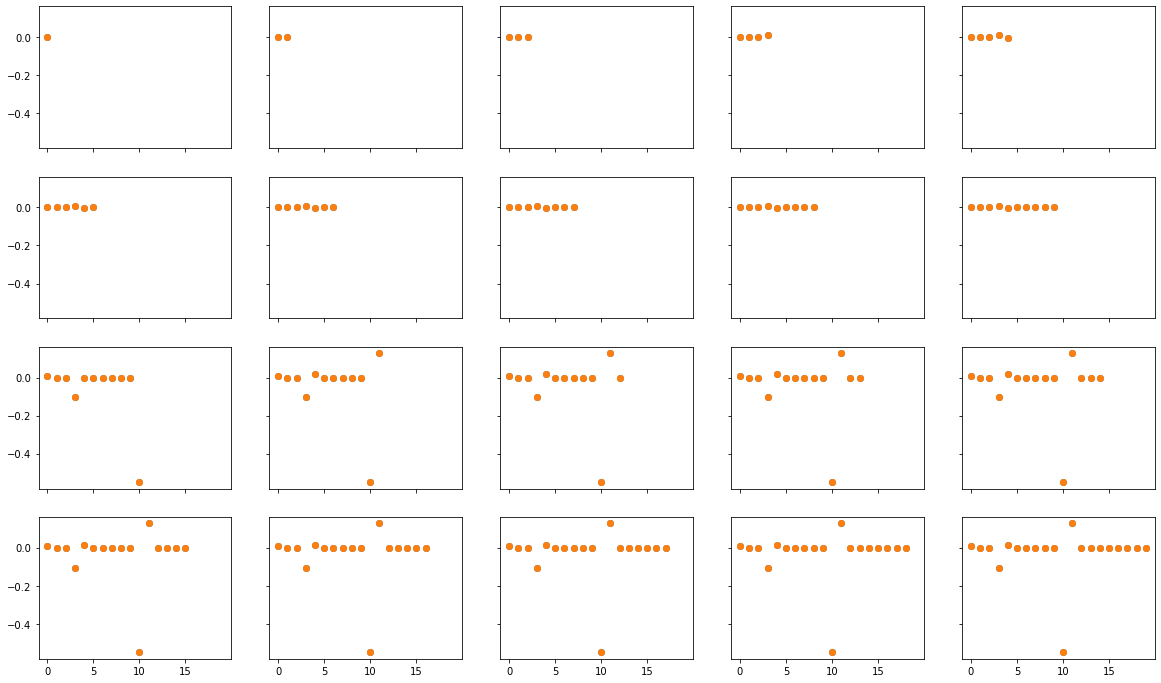

In [26]:
fig, axs = plt.subplots(4, 5, figsize = (20,12), sharex='all', sharey='all')
for i in range(20):
    axs[i//5][i%5].plot(coetotal[i], 'o')
    axs[i//5][i%5].errorbar(np.arange(0,i+1,1), coetotal[i], sigmatotal[i], fmt = "o")

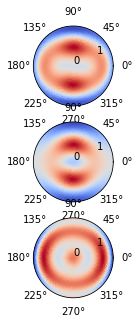

In [46]:
fig, axs = plt.subplots(3, 1, subplot_kw=dict(projection="polar"), figsize = [15,5])
axs[0].pcolormesh(phi*np.pi/180,theta*np.pi/180,resi.reshape(360,91),cmap='coolwarm',shading='auto')
axs[1].pcolormesh(phi*np.pi/180,theta*np.pi/180,fittingmodeltotal[14],cmap='coolwarm',shading='auto')
axs[2].pcolormesh(phi*np.pi/180,theta*np.pi/180,frtotal[14],cmap='coolwarm',shading='auto')

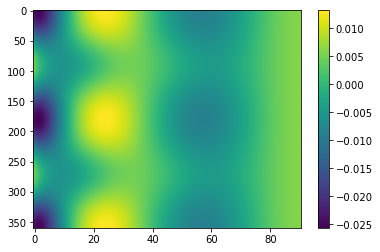

In [42]:
plt.imshow(frtotal[11],aspect = 'auto')
plt.colorbar()

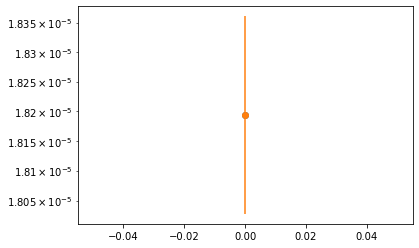

In [43]:
plt.plot(coetotal[0], 'o')
plt.errorbar(np.arange(0,1,1), coetotal[0], sigmatotal[0], fmt = "o")
plt.yscale("log")

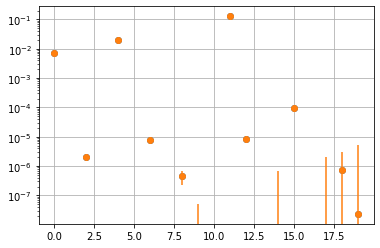

In [44]:
plt.plot(coetotal[19], 'o')
plt.errorbar(np.arange(0,20,1), coetotal[19], sigmatotal[19], fmt = "o")
plt.yscale("log")
plt.grid()

In [45]:
coetotal[19]

matrix([[ 7.32492252e-03],
        [-3.32715135e-05],
        [ 2.09792310e-06],
        [-1.21851813e-01],
        [ 2.02324339e-02],
        [-2.64753345e-06],
        [ 7.97852971e-06],
        [-2.00524896e-06],
        [ 4.51702229e-07],
        [-1.71591427e-07],
        [-5.83154938e-01],
        [ 1.28836351e-01],
        [ 8.15939413e-06],
        [-3.01312781e-03],
        [-1.00054419e-07],
        [ 9.92192392e-05],
        [-4.23622999e-06],
        [-2.96386447e-07],
        [ 7.42144105e-07],
        [ 2.35422890e-08]])

In [31]:
pctotal = []
for i in range(20):
    meansquare = np.sum(np.multiply(frtotal[i],frtotal[i]))/(360*91)
    rms = np.sqrt(meansquare)
    pctotal.append(rms/np.max(gain[0])*100)

In [41]:
pctotal[19]

1.3475264636346447

In [ ]:
plt.plot(pctotal,'o')
plt.title("percentage graph")
plt.xlabel("rank")
plt.ylabel("percentage")

In [33]:
# new graph 2D, x: coefficient number; y: value +- 1 sigma
# log plot, semi-y log plot
# plt.yscale("log")
# plot absolute number +- error bar(always positive, sqrt covarance diagnol)
# start with different plot
# one single plot at the end
# fit the gain[0]
# The percentage plot (Use rms for residual, divide by the peak of the gain, multiply by 100)
# Generate a large rank and slice to get the correct small rank matrix
# For loop for rank 

In [130]:
#Directly fitting beam cube without fitting 2D gaussian


In [147]:
gains = np.array([gain[0].T.flatten()])

In [148]:
resi.T.shape, gains.shape

((32760, 1), (1, 32760))

In [149]:
A = TDHcube[19]
coe = solve(A,gains.T)
finalresi = residual2D(A,gains.T)
fittingmodel = np.matmul(A, coe)
fittingmodel2D = fittingmodel.reshape(360,91)

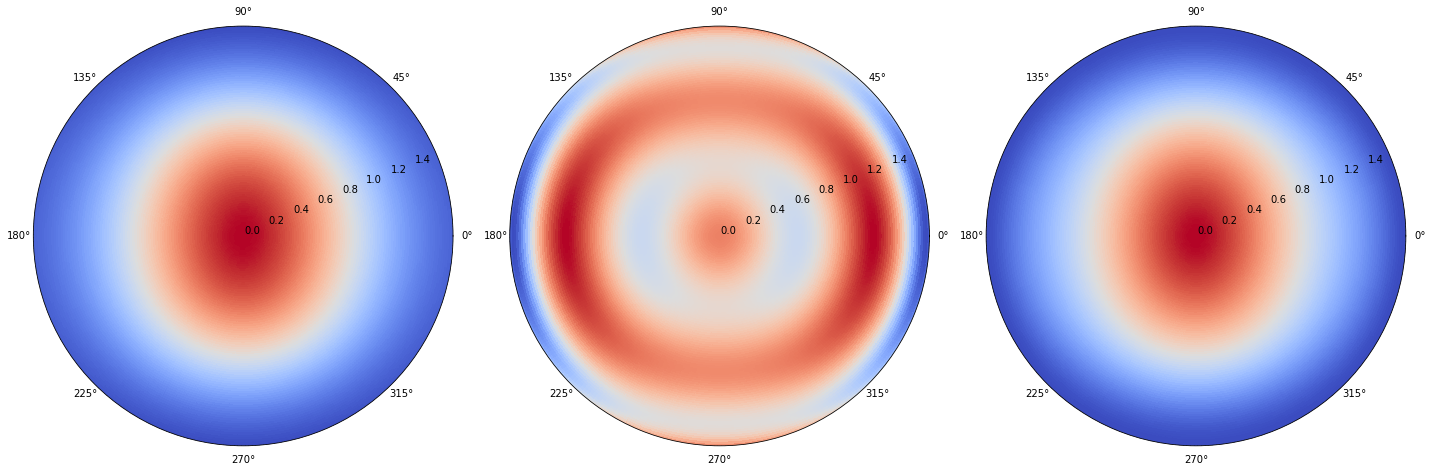

In [150]:
fig, axs = plt.subplots(1, 3, subplot_kw=dict(projection="polar"))
axs[0].pcolormesh(phi*np.pi/180,theta*np.pi/180,fittingmodel2D,cmap='coolwarm',shading='auto')
axs[1].pcolormesh(phi*np.pi/180,theta*np.pi/180,finalresi,cmap='coolwarm',shading='auto')
axs[2].pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[0].T,cmap='coolwarm',shading='auto')

In [154]:
meansquare = np.sum(np.multiply(frtotal[i],frtotal[i]))/(360*91)
rms = np.sqrt(meansquare)
percent = rms/np.max(gain[0])*100

In [156]:
percent, pctotal[19]

(1.2596834302363118, 1.2596834302363118)

In [157]:
A = TDHcube[19]
coe = solve(A,resi.T)
finalresi = residual2D(A,resi.T)
fittingmodel = np.matmul(A, coe)
fittingmodel2D = fittingmodel.reshape(360,91)
cov = covariance(A, resi.T)

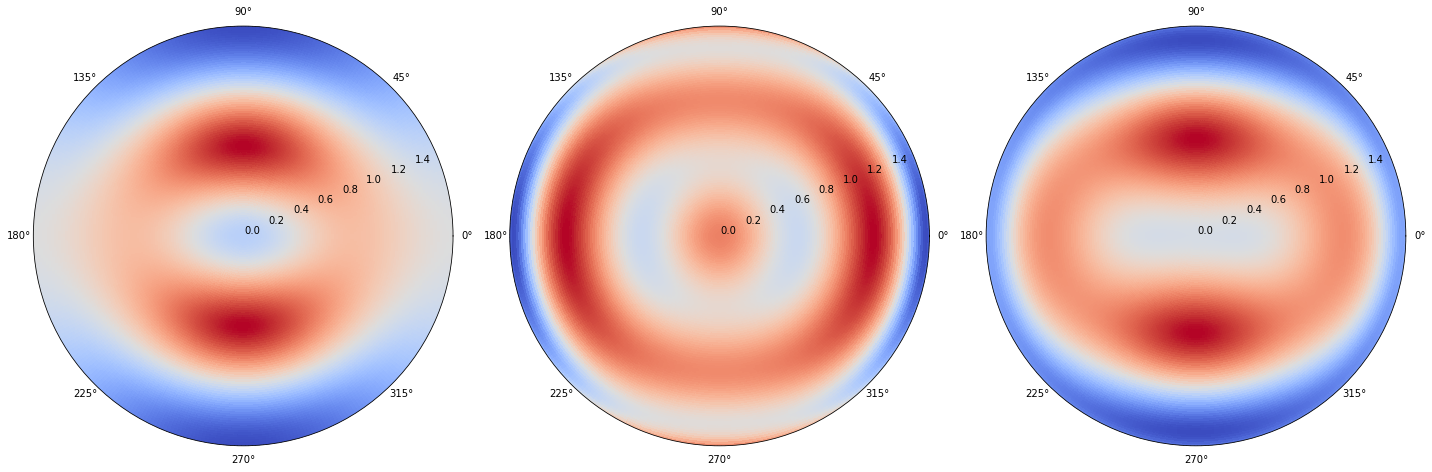

In [160]:
fig, axs = plt.subplots(1, 3, subplot_kw=dict(projection="polar"))
axs[0].pcolormesh(phi*np.pi/180,theta*np.pi/180,fittingmodel2D,cmap='coolwarm',shading='auto')
axs[1].pcolormesh(phi*np.pi/180,theta*np.pi/180,finalresi,cmap='coolwarm',shading='auto')
axs[2].pcolormesh(phi*np.pi/180,theta*np.pi/180,residuals,cmap='coolwarm',shading='auto')